In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/AIN422/Project/

/content/drive/My Drive/Colab Notebooks/AIN422/Project


In [3]:
# Import necessary libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader

from utils import plot_loss
from utils import split_files
from utils import show_images
from utils import plot_results
from utils import resize_images
from utils import plot_comparison
from utils import remove_grayscale
from dataset import ImageDataset

# Set random seeds
torch.manual_seed(7)
random.seed(7)
np.random.seed(7)

In [4]:
!unzip *.zip -d "/content"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/mirflickr/im5499.jpg  
  inflating: /content/mirflickr/im55.jpg  
  inflating: /content/mirflickr/im550.jpg  
  inflating: /content/mirflickr/im5500.jpg  
  inflating: /content/mirflickr/im5501.jpg  
  inflating: /content/mirflickr/im5502.jpg  
  inflating: /content/mirflickr/im5503.jpg  
  inflating: /content/mirflickr/im5504.jpg  
  inflating: /content/mirflickr/im5505.jpg  
  inflating: /content/mirflickr/im5506.jpg  
  inflating: /content/mirflickr/im5507.jpg  
  inflating: /content/mirflickr/im5508.jpg  
  inflating: /content/mirflickr/im5509.jpg  
  inflating: /content/mirflickr/im551.jpg  
  inflating: /content/mirflickr/im5510.jpg  
  inflating: /content/mirflickr/im5511.jpg  
  inflating: /content/mirflickr/im5512.jpg  
  inflating: /content/mirflickr/im5513.jpg  
  inflating: /content/mirflickr/im5514.jpg  
  inflating: /content/mirflickr/im5515.jpg  
  inflating: /content/mirflickr/im5516.jpg  
  inflating:

In [5]:
# Preprocessing the images
if not os.path.exists("/content/dataset"):
    remove_grayscale("/content/mirflickr")
    split_files("/content/mirflickr", "/content/dataset/train", 5000)
    split_files("/content/mirflickr", "/content/dataset/test", 1000)
    resize_images("/content/dataset/train", size=(320,320))
    resize_images("/content/dataset/test", size=(320,320))

## Grayscale images are removed ##
## 5000 files moved successfully. ##
## 1000 files moved successfully. ##
## Images are resized ##
## Images are resized ##


In [6]:
# Device setting
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [7]:
# Paths
train_path = "/content/dataset/train"
test_path = "/content/dataset/test"
models_path = "/content/best_models"

In [8]:
train_dataset = ImageDataset(train_path)
test_dataset = ImageDataset(test_path)

print(f"Train Dataset Size : {len(train_dataset)}")
print(f"Test Dataset Size   : {len(test_dataset)}")

Train Dataset Size : 5000
Test Dataset Size   : 1000


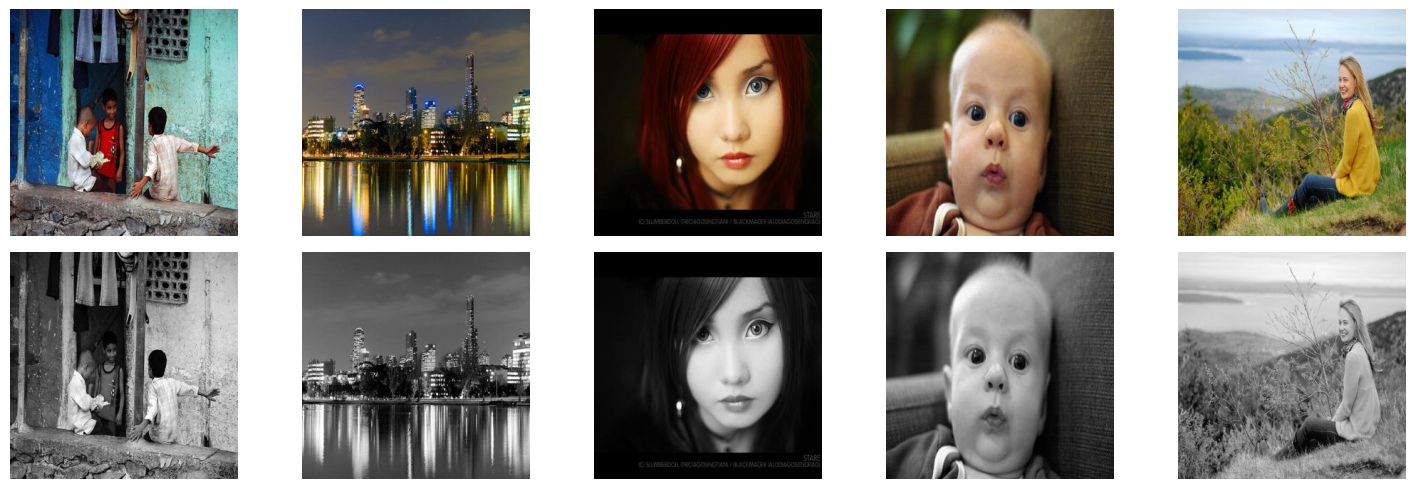

In [9]:
show_images(train_dataset)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

# Training

In [11]:
best_losses = {}

### Model 1

In [151]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv2_bn = nn.BatchNorm2d(64)

        self.t_conv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.t_conv1_bn = nn.BatchNorm2d(32)
        self.t_conv2 = nn.ConvTranspose2d(32, 2, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.relu(self.conv2_bn(self.conv2(x)))

        x = F.relu(self.t_conv1_bn(self.t_conv1(x)))
        x = F.relu(self.t_conv2(x))
        return x

In [ ]:
model = Model1().to(device)
loss_function = nn.MSELoss()

In [ ]:
optimizer = Adam(model.parameters(), lr=0.001)

num_epochs = 120
best_loss = float("inf")

train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for i, (gray, colored) in enumerate(train_loader):
        if torch.cuda.is_available():
            gray = Variable(gray.cuda())
            colored = Variable(colored.cuda())

        outputs = model(gray)

        optimizer.zero_grad()
        loss = loss_function(outputs, colored)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_dataset)
    train_losses.append(train_loss)


    print(f"Epoch: {epoch} || Train Loss: {train_loss:.5f}")

    if train_loss < best_loss:
        torch.save(model.state_dict(), "best_models/Model1_best.model")
        best_loss = train_loss

best_losses["Model1"] = best_loss

Epoch: 0 || Train Loss: 2.44296
Epoch: 1 || Train Loss: 2.32916
Epoch: 2 || Train Loss: 2.24742
Epoch: 3 || Train Loss: 2.21915
Epoch: 4 || Train Loss: 2.21786
Epoch: 5 || Train Loss: 2.22998
Epoch: 6 || Train Loss: 2.17065
Epoch: 7 || Train Loss: 2.19490
Epoch: 8 || Train Loss: 2.21303
Epoch: 9 || Train Loss: 2.21331
Epoch: 10 || Train Loss: 2.17904
Epoch: 11 || Train Loss: 2.19158
Epoch: 12 || Train Loss: 2.17090
Epoch: 13 || Train Loss: 2.19384
Epoch: 14 || Train Loss: 2.22421
Epoch: 15 || Train Loss: 2.18546
Epoch: 16 || Train Loss: 2.19817
Epoch: 17 || Train Loss: 2.16532
Epoch: 18 || Train Loss: 2.18234
Epoch: 19 || Train Loss: 2.17085
Epoch: 20 || Train Loss: 2.23519
Epoch: 21 || Train Loss: 2.17022
Epoch: 22 || Train Loss: 2.14847
Epoch: 23 || Train Loss: 2.15258
Epoch: 24 || Train Loss: 2.15094
Epoch: 25 || Train Loss: 2.16629
Epoch: 26 || Train Loss: 2.18297
Epoch: 27 || Train Loss: 2.17068
Epoch: 28 || Train Loss: 2.19710
Epoch: 29 || Train Loss: 2.17676
Epoch: 30 || Train L

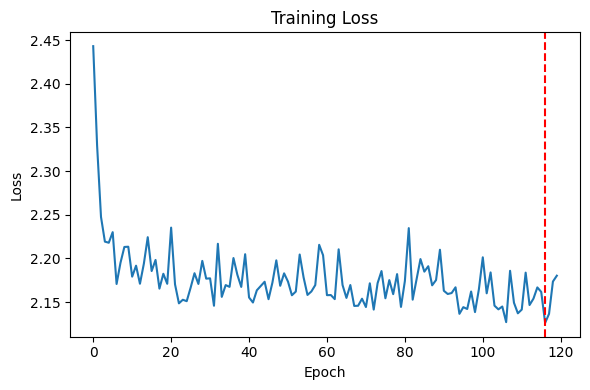

In [ ]:
plot_loss(train_losses, num_epochs)

In [ ]:
loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
gray, colored = next(iter(loader))
checkpoint = torch.load("best_models/Model1_best.model")
model = Model1().to(device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
model.eval()
output = model(gray.to(device))
loss = loss_function(output, colored.to(device))
loss.cpu().data

tensor(418.9743)

In [ ]:
plot_results(gray.cpu() ,output.cpu(), colored.cpu())

Output hidden; open in https://colab.research.google.com to view.

### Model 2

In [24]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3_bn = nn.BatchNorm2d(128)

        self.t_conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.t_conv1_bn = nn.BatchNorm2d(64)
        self.t_conv2 = nn.ConvTranspose2d(128, 32, kernel_size=4, stride=2, padding=1)
        self.t_conv2_bn = nn.BatchNorm2d(32)
        self.t_conv3 = nn.ConvTranspose2d(64, 2, kernel_size=4, stride=2, padding=1)

        self.output = nn.Conv2d(3, 2, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x_1 = F.relu(self.conv1_bn(self.conv1(x)))
        x_2 = F.relu(self.conv2_bn(self.conv2(x_1)))
        x_3 = F.relu(self.conv3_bn(self.conv3(x_2)))

        x_4 = F.relu(self.t_conv1_bn(self.t_conv1(x_3)))
        x_4 = torch.cat((x_4, x_2), 1)
        x_5 = F.relu(self.t_conv2_bn(self.t_conv2(x_4)))
        x_5 = torch.cat((x_5, x_1), 1)
        x_6 = F.relu(self.t_conv3(x_5))
        x_6 = torch.cat((x_6, x), 1)
        x = self.output(x_6)
        return x

In [ ]:
model = Model2().to(device)
loss_function = nn.MSELoss()

In [ ]:
optimizer = Adam(model.parameters(), lr=0.001)

num_epochs = 120
best_loss = float("inf")

train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for i, (gray, colored) in enumerate(train_loader):
        if torch.cuda.is_available():
            gray = Variable(gray.cuda())
            colored = Variable(colored.cuda())

        outputs = model(gray)

        optimizer.zero_grad()
        loss = loss_function(outputs, colored)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_dataset)
    train_losses.append(train_loss)


    print(f"Epoch: {epoch} || Train Loss: {train_loss:.5f}")

    if train_loss < best_loss:
        torch.save(model.state_dict(), "best_models/Model2_best.model")
        best_loss = train_loss

best_losses["Model2"] = best_loss

Epoch: 0 || Train Loss: 2.38614
Epoch: 1 || Train Loss: 2.31020
Epoch: 2 || Train Loss: 2.24849
Epoch: 3 || Train Loss: 2.21246
Epoch: 4 || Train Loss: 2.19919
Epoch: 5 || Train Loss: 2.21476
Epoch: 6 || Train Loss: 2.20103
Epoch: 7 || Train Loss: 2.17868
Epoch: 8 || Train Loss: 2.19574
Epoch: 9 || Train Loss: 2.24017
Epoch: 10 || Train Loss: 2.20056
Epoch: 11 || Train Loss: 2.18305
Epoch: 12 || Train Loss: 2.17355
Epoch: 13 || Train Loss: 2.17376
Epoch: 14 || Train Loss: 2.18867
Epoch: 15 || Train Loss: 2.16858
Epoch: 16 || Train Loss: 2.16809
Epoch: 17 || Train Loss: 2.15122
Epoch: 18 || Train Loss: 2.16353
Epoch: 19 || Train Loss: 2.17774
Epoch: 20 || Train Loss: 2.18815
Epoch: 21 || Train Loss: 2.16081
Epoch: 22 || Train Loss: 2.21663
Epoch: 23 || Train Loss: 2.14175
Epoch: 24 || Train Loss: 2.19025
Epoch: 25 || Train Loss: 2.20651
Epoch: 26 || Train Loss: 2.15530
Epoch: 27 || Train Loss: 2.15231
Epoch: 28 || Train Loss: 2.12712
Epoch: 29 || Train Loss: 2.12096
Epoch: 30 || Train L

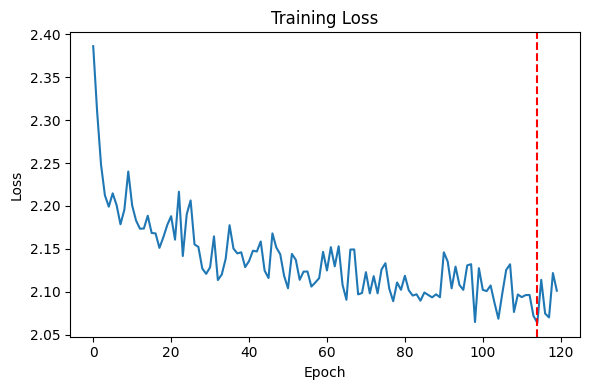

In [ ]:
plot_loss(train_losses, num_epochs)

In [31]:
loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
gray, colored = next(iter(loader))
checkpoint = torch.load("best_models/Model2_best.model")
model = Model2().to(device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [32]:
model.eval()
output = model(gray.to(device))
loss = loss_function(output, colored.to(device))
loss.cpu().data

tensor(204.2305)

In [33]:
plot_results(gray.cpu() ,output.cpu(), colored.cpu())

Output hidden; open in https://colab.research.google.com to view.

### Model 3

In [12]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)
        self.conv4_bn = nn.BatchNorm2d(256)

        self.conv5 = nn.Conv2d(256, 256, kernel_size=4, stride=1, padding=3, dilation=2)
        self.conv5_bn = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=4, stride=1, padding=3, dilation=2)
        self.conv6_bn = nn.BatchNorm2d(256)

        self.t_conv1 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.t_conv1_bn = nn.BatchNorm2d(128)
        self.t_conv2 = nn.ConvTranspose2d(256, 64, kernel_size=4, stride=2, padding=1)
        self.t_conv2_bn = nn.BatchNorm2d(64)
        self.t_conv3 = nn.ConvTranspose2d(128, 32, kernel_size=4, stride=2, padding=1)
        self.t_conv3_bn = nn.BatchNorm2d(32)
        self.t_conv4 = nn.ConvTranspose2d(64, 2, kernel_size=4, stride=2, padding=1)

        self.output = nn.Conv2d(3, 2, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x_1 = F.relu(self.conv1_bn(self.conv1(x)))
        x_2 = F.relu(self.conv2_bn(self.conv2(x_1)))
        x_3 = F.relu(self.conv3_bn(self.conv3(x_2)))
        x_4 = F.relu(self.conv4_bn(self.conv4(x_3)))

        x_5 = F.relu(self.conv5_bn(self.conv5(x_4)))
        x_5_d = F.relu(self.conv6_bn(self.conv6(x_5)))

        x_6 = F.relu(self.t_conv1_bn(self.t_conv1(x_5_d)))
        x_6 = torch.cat((x_6, x_3), 1)
        x_7 = F.relu(self.t_conv2_bn(self.t_conv2(x_6)))
        x_7 = torch.cat((x_7, x_2), 1)
        x_8 = F.relu(self.t_conv3_bn(self.t_conv3(x_7)))
        x_8 = torch.cat((x_8, x_1), 1)
        x_9 = F.relu(self.t_conv4(x_8))
        x_9 = torch.cat((x_9, x), 1)
        x = self.output(x_9)
        return x

In [13]:
model = Model3().to(device)
loss_function = nn.MSELoss()

In [14]:
optimizer = Adam(model.parameters(), lr=0.001)

num_epochs = 30
best_loss = float("inf")

train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for i, (gray, colored) in enumerate(train_loader):
        if torch.cuda.is_available():
            gray = Variable(gray.cuda())
            colored = Variable(colored.cuda())

        outputs = model(gray)

        optimizer.zero_grad()
        loss = loss_function(outputs, colored)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_dataset)
    train_losses.append(train_loss)


    print(f"Epoch: {epoch} || Train Loss: {train_loss:.5f}")

    if train_loss < best_loss:
        torch.save(model.state_dict(), "best_models/Model3_best.model")
        best_loss = train_loss
        print("Model Saved")

best_losses["Model3"] = best_loss

Epoch: 0 || Train Loss: 2.36166
Model Saved
Epoch: 1 || Train Loss: 2.26180
Model Saved
Epoch: 2 || Train Loss: 2.24877
Model Saved
Epoch: 3 || Train Loss: 2.26015
Epoch: 4 || Train Loss: 2.21169
Model Saved
Epoch: 5 || Train Loss: 2.17284
Model Saved
Epoch: 6 || Train Loss: 2.18609
Epoch: 7 || Train Loss: 2.16837
Model Saved
Epoch: 8 || Train Loss: 2.15807
Model Saved
Epoch: 9 || Train Loss: 2.14448
Model Saved
Epoch: 10 || Train Loss: 2.15299
Epoch: 11 || Train Loss: 2.14292
Model Saved
Epoch: 12 || Train Loss: 2.19755
Epoch: 13 || Train Loss: 2.11087
Model Saved
Epoch: 14 || Train Loss: 2.12330
Epoch: 15 || Train Loss: 2.13483
Epoch: 16 || Train Loss: 2.14693
Epoch: 17 || Train Loss: 2.13009
Epoch: 18 || Train Loss: 2.16090
Epoch: 19 || Train Loss: 2.11967
Epoch: 20 || Train Loss: 2.08523
Model Saved
Epoch: 21 || Train Loss: 2.11438
Epoch: 22 || Train Loss: 2.08882
Epoch: 23 || Train Loss: 2.06754
Model Saved
Epoch: 24 || Train Loss: 2.10279
Epoch: 25 || Train Loss: 2.07255
Epoch: 2

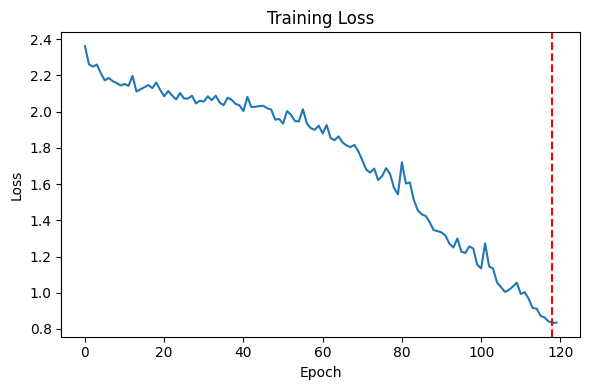

In [15]:
plot_loss(train_losses, num_epochs)

In [236]:
loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
gray, colored = next(iter(loader))
checkpoint = torch.load("best_models/Model3_best.model")
model = Model3().to(device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [237]:
model.eval()
output = model(gray.to(device))
loss = loss_function(output, colored.to(device))
loss.cpu().data

tensor(396.4270)

In [238]:
plot_results(gray.cpu() ,output.cpu(), colored.cpu())

Output hidden; open in https://colab.research.google.com to view.

# TEST

In [ ]:
def compare_loss(losses_dict):
    models = list(losses_dict.keys())
    loss_values = [losses_dict[model] for model in models]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.bar(models, loss_values)
    ax.set_ylabel('Loss')
    ax.set_title('Losses of Different Models')

    plt.tight_layout()
    plt.show()

compare_loss(best_losses)

In [222]:
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
gray, colored = next(iter(test_loader))

In [223]:
model1 = Model1().to(device)
model1.load_state_dict(torch.load("best_models/Model1_best.model"))
model1.eval()
output1 = model1(gray.to(device))

In [224]:
model2 = Model2().to(device)
model2.load_state_dict(torch.load("best_models/Model2_best.model"))
model2.eval()
output2 = model2(gray.to(device))

In [225]:
model3 = Model3().to(device)
model3.load_state_dict(torch.load("best_models/Model3_best.model"))
model3.eval()
output3 = model3(gray.to(device))

In [226]:
plot_comparison(gray.cpu(), output1.cpu(), output2.cpu(), output3.cpu())

Output hidden; open in https://colab.research.google.com to view.